In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [ ]:
# Load the dataset
file_path = 'estat_nrg_bal_s_filtered.tsv'
data = pd.read_csv(file_path, sep='\t')

# Display structure
print(data.head())
print(data.columns)

  freq,nrg_bal,siec,unit,geo\TIME_PERIOD       1990        1991        1992   \
0           A,EXP,C0000X0350-0370,GWH,AL    623.390     273.417     273.417    
1           A,EXP,C0000X0350-0370,GWH,AT     27.259      55.694     176.990    
2           A,EXP,C0000X0350-0370,GWH,BA          :           :           :    
3           A,EXP,C0000X0350-0370,GWH,BE  13026.779   13515.810   11497.930    
4           A,EXP,C0000X0350-0370,GWH,BG    501.220      51.294     520.272    

        1993        1994        1995        1996        1997        1998   \
0     21.873       0.000       0.000       0.000       0.000       0.000    
1     54.324       0.000      21.056     144.027     174.739      82.073    
2          :           :           :           :           :           :    
3  11529.786   12983.497   10802.412   11830.204   13986.410   11275.571    
4     34.510      16.446      25.122      49.895      41.751      94.000    

   ...      2014       2015       2016       2017       

In [3]:
data.head()

,"freq,nrg_bal,siec,unit,geo\TIME_PERIOD",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"A,EXP,C0000X0350-0370,GWH,AL",623.390,273.417,273.417,21.873,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,651.161,:
1,"A,EXP,C0000X0350-0370,GWH,AT",27.259,55.694,176.990,54.324,0.000,21.056,144.027,174.739,82.073,...,18.575,573.584,405.039,422.345,444.978,387.222,304.602,452.424,414.724,384.521
2,"A,EXP,C0000X0350-0370,GWH,BA",:,:,:,:,:,:,:,:,:,...,4158.681,3640.547,3762.987,3138.718,5058.286,4087.264,3357.003,3770.356,5800.697,:
3,"A,EXP,C0000X0350-0370,GWH,BE",13026.779,13515.810,11497.930,11529.786,12983.497,10802.412,11830.204,13986.410,11275.571,...,6372.755,1071.731,588.376,798.570,597.353,961.265,1785.409,816.557,945.837,1405.455
4,"A,EXP,C0000X0350-0370,GWH,BG",501.220,51.294,520.272,34.510,16.446,25.122,49.895,41.751,94.000,...,250.283,171.390,51.113,108.228,202.927,252.090,135.830,41.947,911.283,2104.852


### Processing & Cleaning

In [4]:
# Split the combined column into separate columns
columns_split = data.columns[0].split(',')
column_names = ['Frequency', 'Industry', 'Energy', 'Unit', 'Country']


# Extract the first row to split and expand the attributes
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = column_names

# Concatenate the split columns with the rest of the data
cleaned_data = pd.concat([split_columns, data.drop(columns=data.columns[0])], axis=1)

# Replace ':' with NaN (commonly used to denote missing or unavailable data in Eurostat datasets)
cleaned_data.replace(':', pd.NA, inplace=True)

# Convert year columns to numeric types for analysis
for year in cleaned_data.columns[5:]:
    cleaned_data[year] = pd.to_numeric(cleaned_data[year], errors='coerce')
    cleaned_data[year] = cleaned_data[year].interpolate(method='linear', limit_direction='both')

# Display the cleaned and structured head of the dataset
cleaned_data.head()


,Frequency,Industry,Energy,Unit,Country,1990,1991,1992,1993,1994,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A,EXP,C0000X0350-0370,GWH,AL,623.390,273.417,273.417,21.873,0.0000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,651.161,384.521
1,A,EXP,C0000X0350-0370,GWH,AT,27.259,55.694,176.990,54.324,0.0000,...,18.575,573.584,405.039,422.345,444.978,387.222,304.602,452.424,414.724,384.521
2,A,EXP,C0000X0350-0370,GWH,BA,6527.019,6785.752,5837.460,5792.055,6491.7485,...,4158.681,3640.547,3762.987,3138.718,5058.286,4087.264,3357.003,3770.356,5800.697,894.988
3,A,EXP,C0000X0350-0370,GWH,BE,13026.779,13515.810,11497.930,11529.786,12983.4970,...,6372.755,1071.731,588.376,798.570,597.353,961.265,1785.409,816.557,945.837,1405.455
4,A,EXP,C0000X0350-0370,GWH,BG,501.220,51.294,520.272,34.510,16.4460,...,250.283,171.390,51.113,108.228,202.927,252.090,135.830,41.947,911.283,2104.852


Mapping the classification codes to their actual names of industries as well as energies so that it's more understandable which one we are talking about.

In [5]:
# Mappings for Energy Codes
energy_mappings = {
    'TOTAL': 'Total',
    'C0000X0350-0370': 'Solid fossil fuels',
    'C0350-0370': 'Manufactured gases',
    'P1000': 'Peat and peat products',
    'S2000': 'Oil shale and oil sands',
    'G3000': 'Natural gas',
    'O4000XBIO': 'Oil and petroleum products (excluding biofuel portion)',
    'R4000': 'Renewables and biofuels',
    'W6100_6220': 'Non-renewable waste',
    'N900H': 'Nuclear heat',
    'E7000': 'Electricity',
    'H8000': 'Heat',
    'RA000':'Renewables & Biofuels'
}
cleaned_data['Energy'] = cleaned_data['Energy'].map(energy_mappings)

In [6]:
# Mappings for Industry Codes
industry_mappings = {
    'PPRD': 'Primary production',
    'RCV_RCY': 'Recovered & Recycled products',
    'STK_CHG':'Change in Stock',
    'DL': 'Distribution losses',
    'AFC': 'Available for Final Consumption',
    'IMP': 'Import',
    'EXP': 'Export',
    'FC_NE':'non-energy use',
    'FC_E':'energy use',
    'FC_IND_E': 'energy use',
    'FC_IND_IS_E': 'iron and steel',
    'FC_IND_CPC_E': 'chemical and petrochemical',
    'FC_IND_NFM_E': 'non-ferrous metals',
    'FC_IND_NMM_E': 'non-metallic minerals',
    'FC_IND_TE_E': 'transport equipment',
    'FC_IND_MAC_E': 'machinery',
    'FC_IND_MO_E': 'mining and quarrying',
    'FC_IND_FBT_E': 'food, beverages and tobacco',
    'FC_IND_PPP_E': 'paper, pulp and printing',
    'FC_IND_WP_E': 'wood and wood products',
    'FC_IND_CON_E': 'construction',
    'FC_IND_TL_E': 'textile and leather',
    'FC_IND_NSP_E': 'not elsewhere specified'

}

# Apply mappings to the dataset
cleaned_data['Industry'] = cleaned_data['Industry'].map(industry_mappings)



In [7]:
cleaned_data.head()

,Frequency,Industry,Energy,Unit,Country,1990,1991,1992,1993,1994,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A,Export,Solid fossil fuels,GWH,AL,623.390,273.417,273.417,21.873,0.0000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,651.161,384.521
1,A,Export,Solid fossil fuels,GWH,AT,27.259,55.694,176.990,54.324,0.0000,...,18.575,573.584,405.039,422.345,444.978,387.222,304.602,452.424,414.724,384.521
2,A,Export,Solid fossil fuels,GWH,BA,6527.019,6785.752,5837.460,5792.055,6491.7485,...,4158.681,3640.547,3762.987,3138.718,5058.286,4087.264,3357.003,3770.356,5800.697,894.988
3,A,Export,Solid fossil fuels,GWH,BE,13026.779,13515.810,11497.930,11529.786,12983.4970,...,6372.755,1071.731,588.376,798.570,597.353,961.265,1785.409,816.557,945.837,1405.455
4,A,Export,Solid fossil fuels,GWH,BG,501.220,51.294,520.272,34.510,16.4460,...,250.283,171.390,51.113,108.228,202.927,252.090,135.830,41.947,911.283,2104.852


In [8]:
# Handle missing values
cleaned_data.fillna('Unknown', inplace=True)


In [ ]:
print(cleaned_data.describe())

# Check for unique values in categorical fields
print(cleaned_data['Industry'].unique())
print(cleaned_data['Energy'].unique())


              1990          1991          1992          1993          1994   \
count  2.796300e+04  2.796300e+04  2.796300e+04  2.796300e+04  2.796300e+04   
mean   3.765666e+04  3.714972e+04  3.505304e+04  3.341679e+04  3.186165e+04   
std    4.708077e+05  4.622770e+05  4.579381e+05  4.512042e+05  4.521708e+05   
min   -1.770336e+05 -1.884772e+05 -7.557915e+05 -6.059520e+04 -1.717807e+05   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    8.663533e+02  7.020105e+02  5.989638e+02  6.781450e+02  7.181665e+02   
max    4.272312e+07  4.199733e+07  4.205156e+07  4.155703e+07  4.223359e+07   

              1995          1996          1997          1998          1999   \
count  2.796300e+04  2.796300e+04  2.796300e+04  2.796300e+04  2.796300e+04   
mean   3.306161e+04  3.353445e+04  3.337643e+04  3.244303e+04  3.222042e+04   
std    4.615103e+05  4.791030e+05  4.823176e+05  4.

In [10]:
# Check column names to verify the exact names
print(cleaned_data.columns)


Index(['Frequency', 'Industry', 'Energy', 'Unit', 'Country', '1990 ', '1991 ',
       '1992 ', '1993 ', '1994 ', '1995 ', '1996 ', '1997 ', '1998 ', '1999 ',
       '2000 ', '2001 ', '2002 ', '2003 ', '2004 ', '2005 ', '2006 ', '2007 ',
       '2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ',
       '2016 ', '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 ', '2023 '],
      dtype='object')


In [ ]:
# Strip trailing spaces from column names
cleaned_data.columns = cleaned_data.columns.str.strip()

# Now perform the numeric conversion and summing
for year in range(1990, 2024):
    cleaned_data[str(year)] = pd.to_numeric(cleaned_data[str(year)], errors='coerce')

cleaned_data['Total Consumption'] = cleaned_data[[str(year) for year in range(1990, 2024)]].sum(axis=1)

print(cleaned_data[['Country', 'Total Consumption']])


      Country  Total Consumption
0          AL           2227.779
1          AT           8390.595
2          BA         172348.322
3          BE         280118.317
4          BG          10826.247
...       ...                ...
27958      SK             47.000
27959      TR             80.000
27960      UA             80.000
27961      UK             80.000
27962      XK             80.000

[27963 rows x 2 columns]


### Visualizations

Data for AL:
2000    4.125067e+05
2001    4.545062e+05
2002    4.995742e+05
2003    4.980800e+05
2004    4.864017e+05
2005    4.966410e+05
2006    5.215887e+05
2007    5.363744e+05
2008    5.760215e+05
2009    6.501549e+05
2010    7.440450e+05
2011    7.597492e+05
2012    7.386532e+05
2013    8.687949e+05
2014    8.773165e+05
2015    8.489525e+05
2016    7.934318e+05
2017    7.423069e+05
2018    8.021553e+05
2019    7.904201e+05
2020    7.646489e+05
2021    8.112112e+05
2022    7.759862e+05
2023    5.970544e+06
dtype: float64
Data for AT:
2000    5.299334e+06
2001    5.637255e+06
2002    5.683920e+06
2003    6.026503e+06
2004    6.282749e+06
2005    6.424858e+06
2006    6.399606e+06
2007    6.421852e+06
2008    6.536767e+06
2009    6.319728e+06
2010    6.603786e+06
2011    6.651733e+06
2012    6.672703e+06
2013    6.578052e+06
2014    6.538959e+06
2015    6.635168e+06
2016    6.731361e+06
2017    6.861980e+06
2018    6.793244e+06
2019    7.191017e+06
2020    6.575024e+06
2021    6.7941

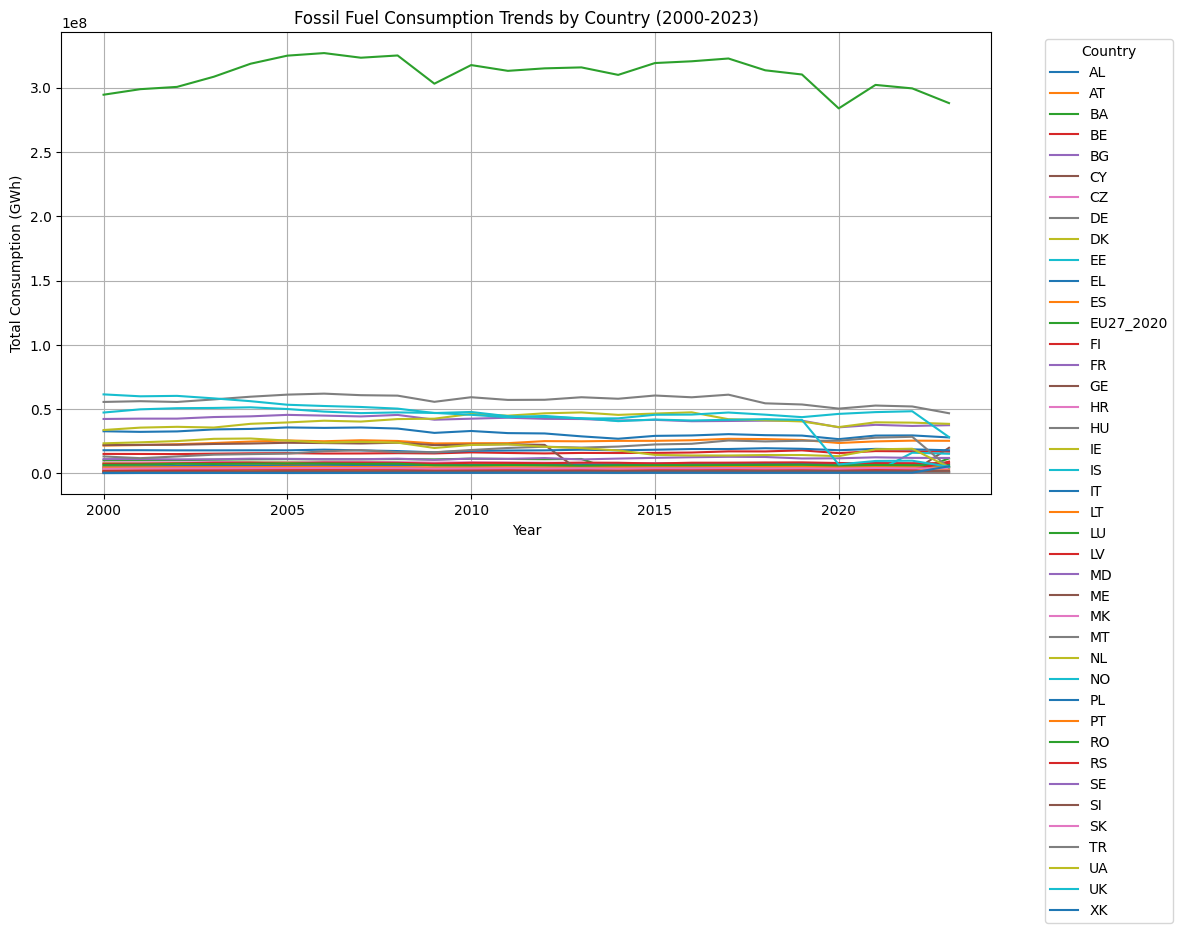

In [24]:
plt.figure(figsize=(12, 6))

# Check and plot data for each country
for country in cleaned_data['Country'].unique():
    country_data = cleaned_data[cleaned_data['Country'] == country]

    # Print some output to verify correct data fetching
    print(f"Data for {country}:")
    print(country_data[[str(year) for year in range(2000, 2024)]].sum(axis=0))  # Display summed data to verify
    
    yearly_totals = []
    for year in range(2000, 2024):
        year_str = str(year)
        if year_str in country_data.columns:
            yearly_total = country_data[year_str].sum()
            yearly_totals.append(yearly_total)
        else:
            yearly_totals.append(0)  # Append zero if the year column doesn't exist

    # Plot the data for the country
    plt.plot(range(2000, 2024), yearly_totals, label=country)

# Adding plot titles and labels
plt.title('Fossil Fuel Consumption Trends by Country (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Total Consumption (GWh)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [25]:
# Group data by 'Industry' and sum up the energy consumption across all years
industry_energy_total = cleaned_data.groupby('Industry').sum()

# Sum across rows to get total consumption per industry
industry_energy_total['Total by Industry'] = industry_energy_total.sum(axis=1)

# Similarly, for energy types
energy_type_total = cleaned_data.groupby('Energy').sum()
energy_type_total['Total by Energy'] = energy_type_total.sum(axis=1)

C:\Users\Anum\AppData\Local\Temp\ipykernel_27264\197835058.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  industry_energy_total = cleaned_data.groupby('Industry').sum()
C:\Users\Anum\AppData\Local\Temp\ipykernel_27264\197835058.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  energy_type_total = cleaned_data.groupby('Energy').sum()


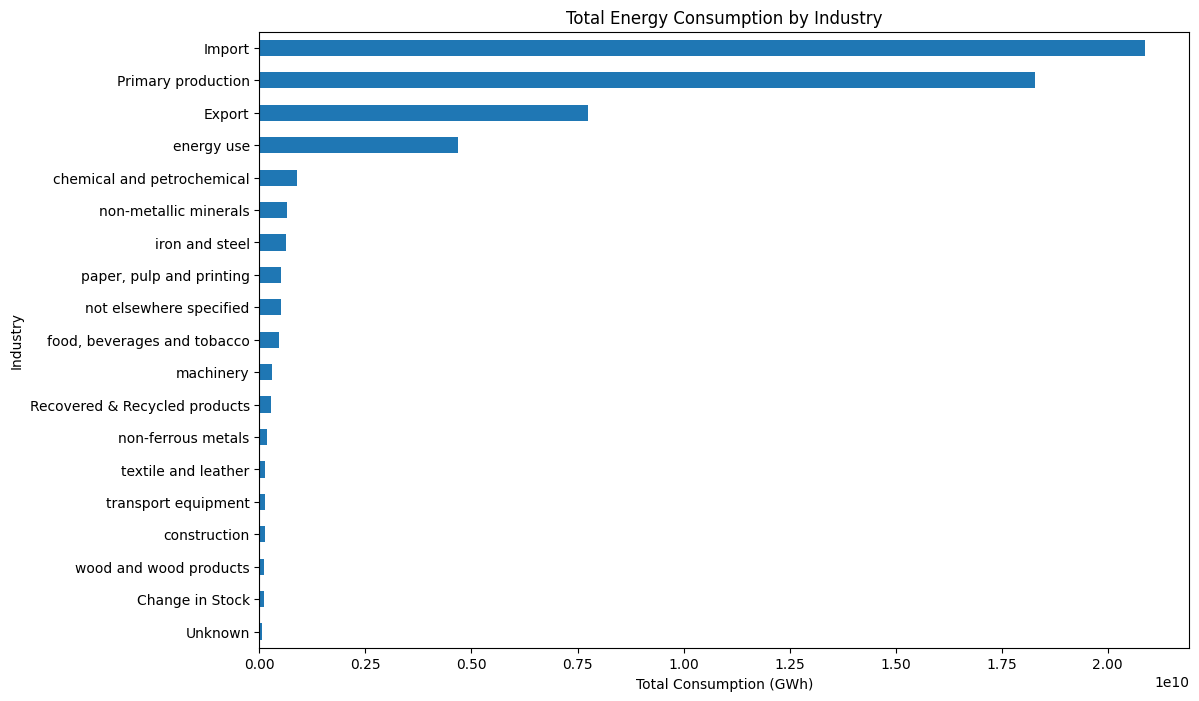

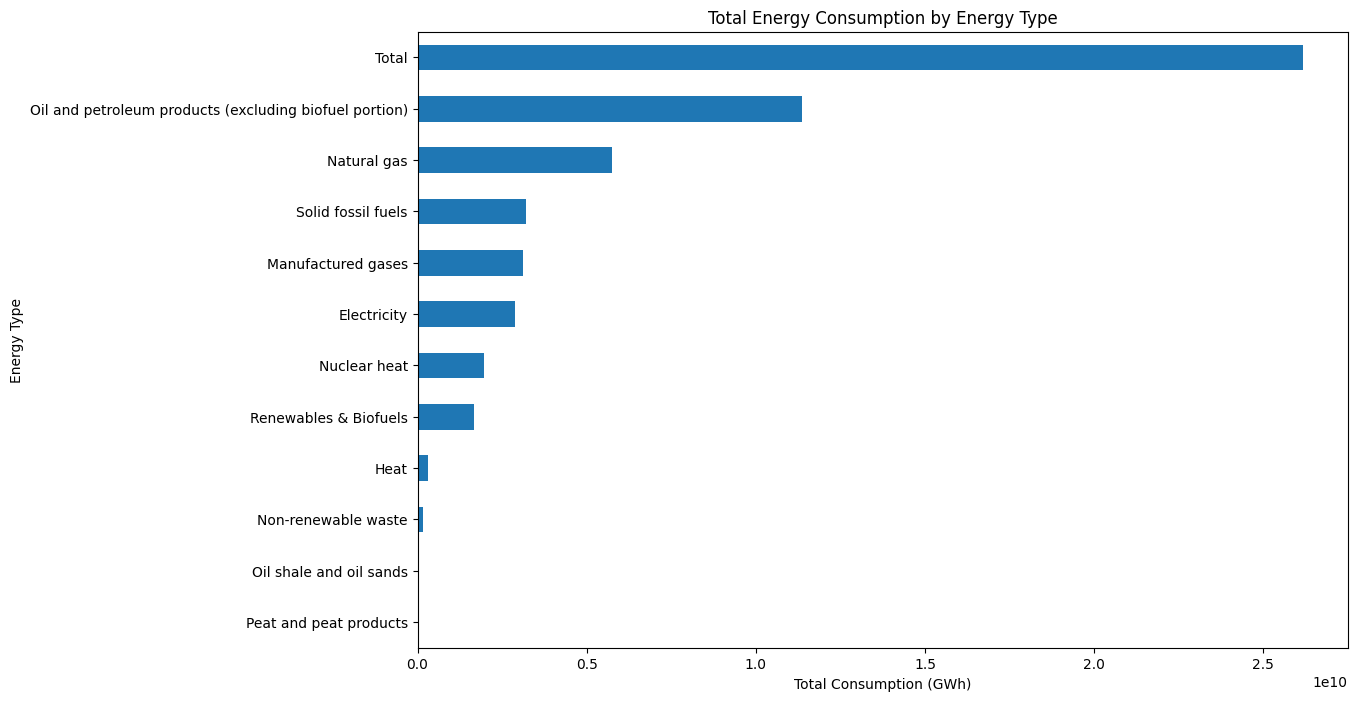

In [26]:
# Plotting Total Consumption by Industry
plt.figure(figsize=(12, 8))
industry_energy_total['Total by Industry'].sort_values().plot(kind='barh')
plt.title('Total Energy Consumption by Industry')
plt.xlabel('Total Consumption (GWh)')
plt.ylabel('Industry')
plt.show()

# Plotting Total Consumption by Energy Type
plt.figure(figsize=(12, 8))
energy_type_total['Total by Energy'].sort_values().plot(kind='barh')
plt.title('Total Energy Consumption by Energy Type')
plt.xlabel('Total Consumption (GWh)')
plt.ylabel('Energy Type')
plt.show()

#### Heatmap visualization 

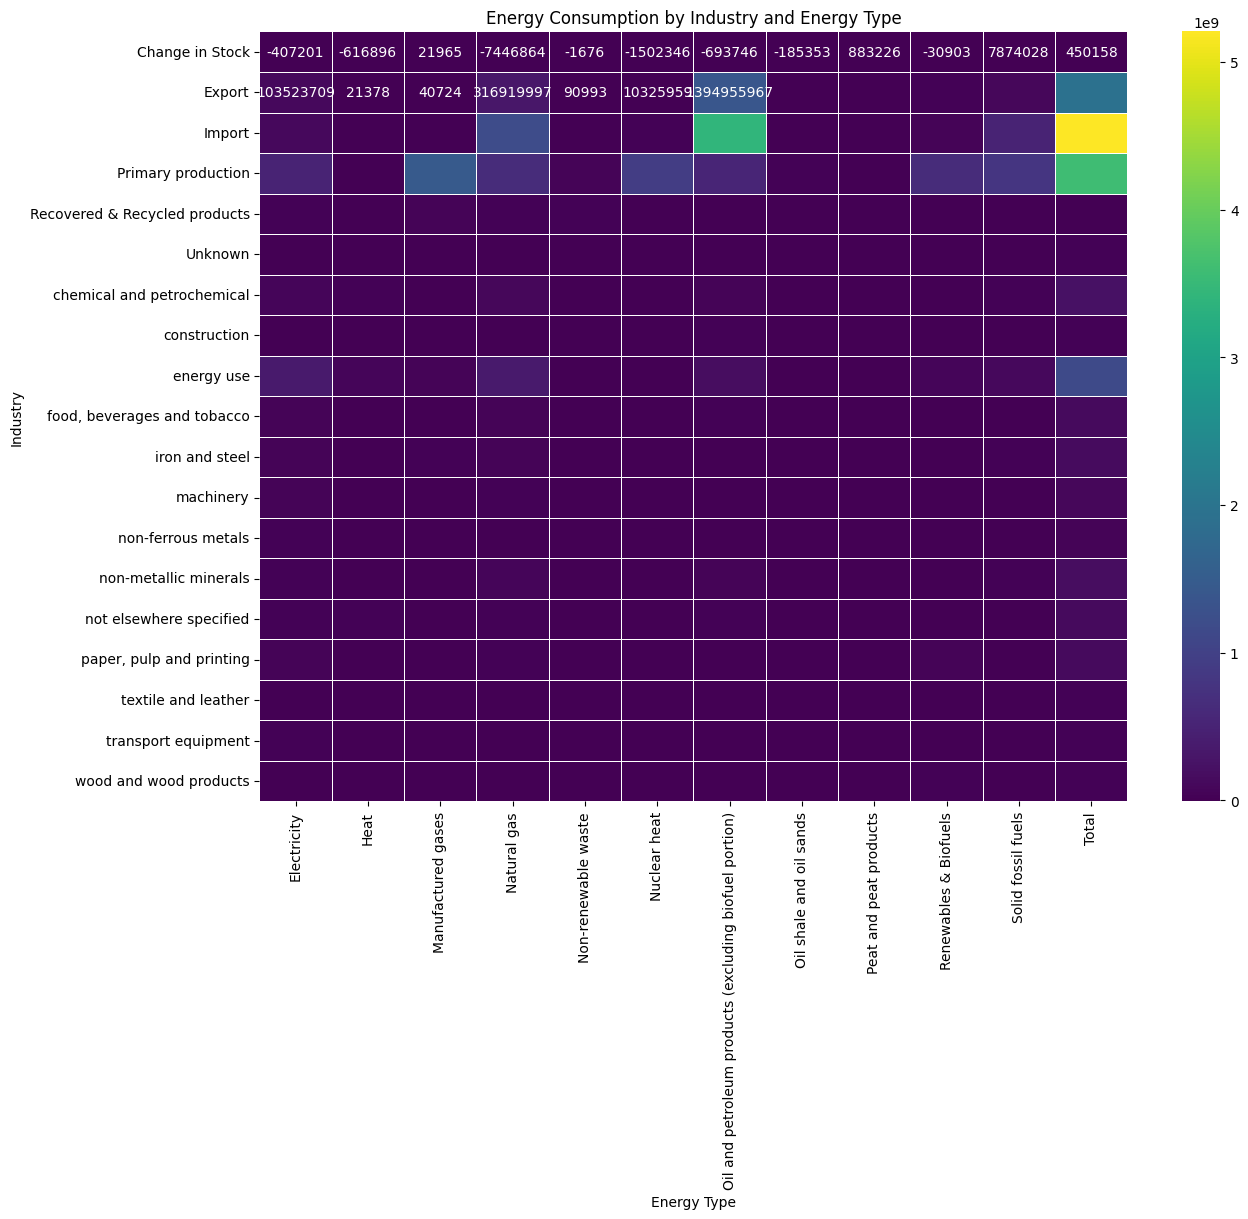

In [16]:
# Create a pivot table for the heatmap
pivot_table = cleaned_data.pivot_table(index='Industry', columns='Energy', values='Total Consumption', aggfunc='sum', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", linewidths=.5, cmap='viridis')
plt.title('Energy Consumption by Industry and Energy Type')
plt.xlabel('Energy Type')
plt.ylabel('Industry')
plt.show()

#### Stacked bar chart
For more comprehensive analysis on which industry used the most energy and which enerygy.

In [17]:
# Create a pivot table with industries as rows, energy types as columns, and summing up the consumption
industry_energy_pivot = cleaned_data.pivot_table(index='Industry', columns='Energy', values='Total Consumption', aggfunc='sum', fill_value=0)

# Print the pivot table to verify it looks correct
print(industry_energy_pivot.head())

Energy                          Electricity          Heat  Manufactured gases  \
Industry                                                                        
Change in Stock               -4.072013e+05 -6.168963e+05        2.196488e+04   
Export                         1.035237e+08  2.137841e+04        4.072358e+04   
Import                         1.032899e+08  5.505033e+04        5.519063e+04   
Primary production             4.900022e+08  2.464508e+06        1.457582e+09   
Recovered & Recycled products  2.695949e+07  1.157239e+07        3.465305e+07   

Energy                          Natural gas  Non-renewable waste  \
Industry                                                           
Change in Stock               -7.446864e+06        -1.675922e+03   
Export                         3.169200e+08         9.099341e+04   
Import                         1.175182e+09         8.435354e+05   
Primary production             6.370582e+08         3.601630e+07   
Recovered & Recycled pro

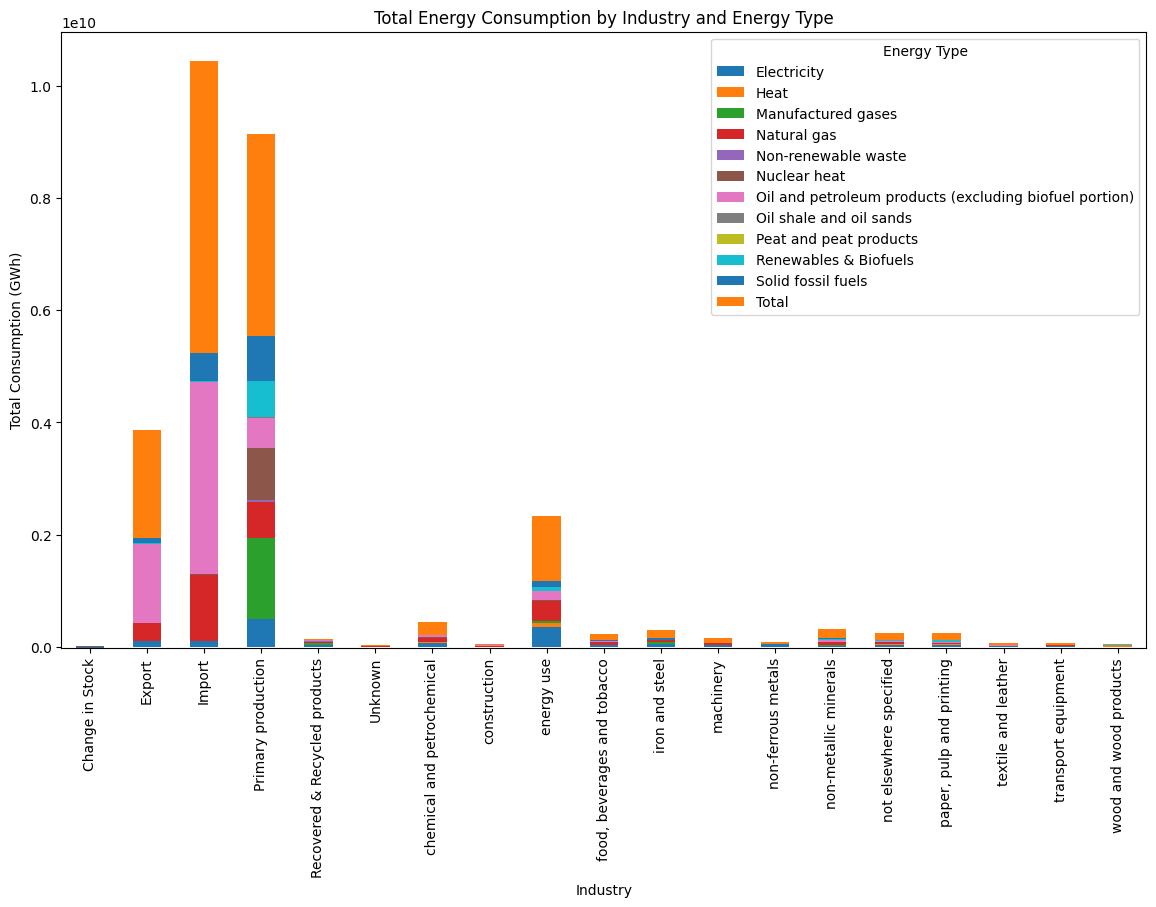

In [18]:
# Plotting the stacked bar chart
industry_energy_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Total Energy Consumption by Industry and Energy Type')
plt.xlabel('Industry')
plt.ylabel('Total Consumption (GWh)')
plt.legend(title='Energy Type')
plt.show()


In [19]:
# Check for negative values
print("Negative value counts by energy type:")
for column in cleaned_data.columns:
    if cleaned_data[column].dtype == 'float64' or cleaned_data[column].dtype == 'int64':
        print(f"{column}: {cleaned_data[cleaned_data[column] < 0][column].count()} negatives")

# Setting negative values to zero
for column in cleaned_data.columns:
    if cleaned_data[column].dtype in ['float64', 'int64']:
        cleaned_data.loc[cleaned_data[column] < 0, column] = 0

Negative value counts by energy type:
1990: 234 negatives
1991: 423 negatives
1992: 576 negatives
1993: 193 negatives
1994: 219 negatives
1995: 282 negatives
1996: 528 negatives
1997: 516 negatives
1998: 494 negatives
1999: 210 negatives
2000: 279 negatives
2001: 150 negatives
2002: 246 negatives
2003: 252 negatives
2004: 282 negatives
2005: 321 negatives
2006: 369 negatives
2007: 471 negatives
2008: 645 negatives
2009: 558 negatives
2010: 459 negatives
2011: 558 negatives
2012: 273 negatives
2013: 525 negatives
2014: 561 negatives
2015: 540 negatives
2016: 465 negatives
2017: 528 negatives
2018: 540 negatives
2019: 627 negatives
2020: 522 negatives
2021: 360 negatives
2022: 687 negatives
2023: 789 negatives
Total Consumption: 767 negatives


#### Pie chart
To get the numbers in percentage for clear view that which industry used the most percentage of energy/fossil fuel.

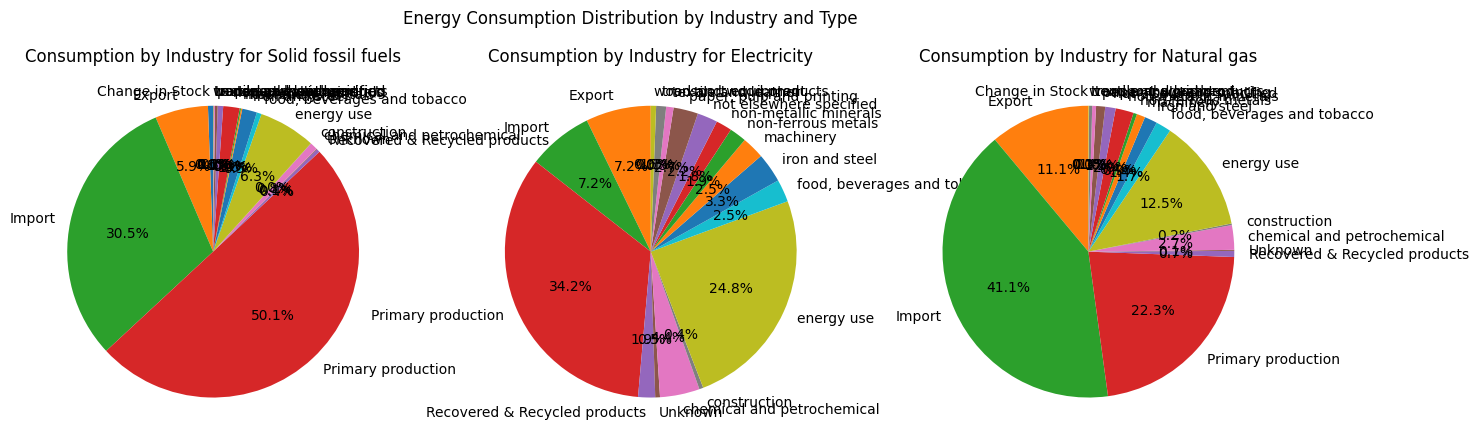

In [ ]:
pivot_table = cleaned_data.pivot_table(values='Total Consumption', index='Industry', columns='Energy', aggfunc='sum', fill_value=0)

# Plot pie charts for each major energy type
fig, axes = plt.subplots(1, 3, figsize=(16, 5)) 
energy_types = ['Solid fossil fuels', 'Electricity', 'Natural gas', 'Heat', 'Manufactured gases', 'Oil and petroleum products (excluding biofuel portion)']  
for ax, energy in zip(axes, energy_types):
    if energy in pivot_table.columns:
        pivot_data = pivot_table[energy]
        pivot_data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
        ax.set_ylabel('')
        ax.set_title(f'Consumption by Industry for {energy}')

plt.suptitle('Energy Consumption Distribution by Industry and Type')
plt.show()


This pie chart integration was done in order to separately check which fossil fuel was used the most in which industry. That could also be useful for detailed analysis for the question asked in this assignment that wich industry are the biggest consumers of fossil fuels in EU. 

In [21]:
# Aggregate this total by industry
total_consumption_by_industry = cleaned_data.groupby('Industry')['Total Consumption'].sum()

# Sort the data for better visualization
total_consumption_by_industry = total_consumption_by_industry.sort_values()

# Print the data to verify
print(total_consumption_by_industry)

Industry
Change in Stock                  1.678846e+07
Unknown                          3.394894e+07
wood and wood products           5.823690e+07
construction                     6.181316e+07
transport equipment              6.258125e+07
textile and leather              6.288207e+07
non-ferrous metals               9.129603e+07
Recovered & Recycled products    1.353334e+08
machinery                        1.525194e+08
food, beverages and tobacco      2.356030e+08
not elsewhere specified          2.502898e+08
paper, pulp and printing         2.518854e+08
iron and steel                   3.097668e+08
non-metallic minerals            3.250329e+08
chemical and petrochemical       4.419563e+08
energy use                       2.338718e+09
Export                           3.872948e+09
Primary production               9.140927e+09
Import                           1.043996e+10
Name: Total Consumption, dtype: float64


#### Horizontal bar graph

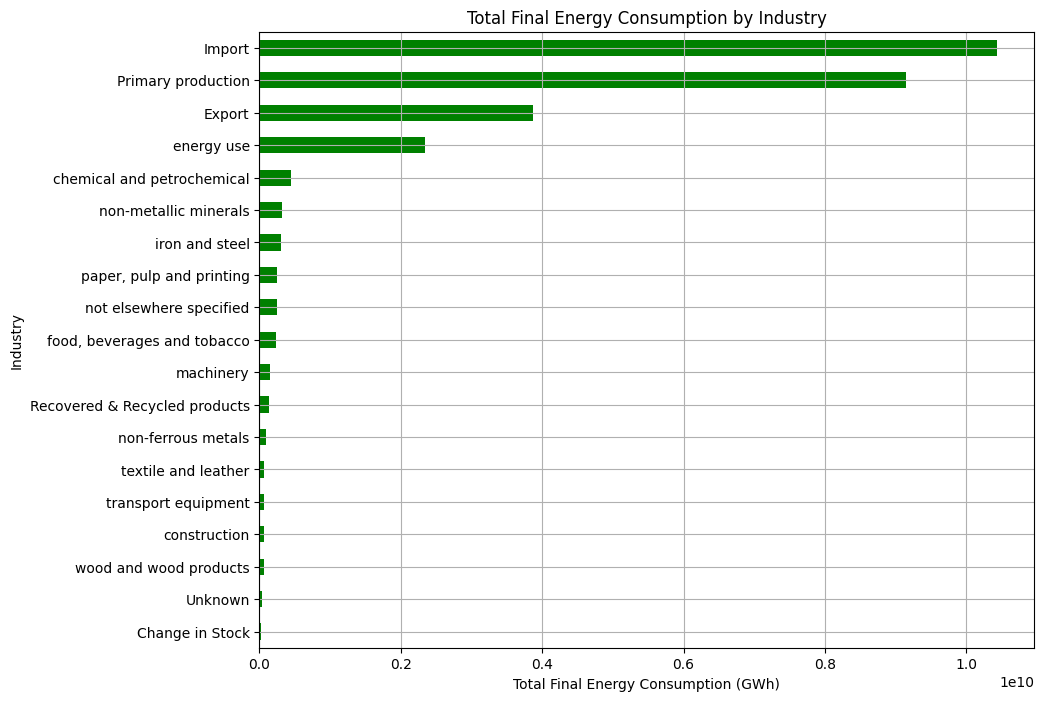

In [ ]:
plt.figure(figsize=(10, 8))
total_consumption_by_industry.plot(kind='barh', color='green')
plt.xlabel('Total Final Energy Consumption (GWh)')
plt.title('Total Final Energy Consumption by Industry')
plt.grid(True) 
plt.show()


After all the visualizations, we can conclude that mainly the fossil fuels have been used for improt export industry and also primary production (that might include agriculture, forestry, fishing etc). Other than these ones, fossil fuels most used were in the chemical/pertochemical industry, going further to metallic, and non-metallic minerals.